# Model 2: Final Popularity Prediction

## Introduction

The final popularity of YouTube videos could influence their final performance, but how can we know what kind of these relations are? Will they be linear, or will they have some more interesting and intricate characteristics? Since we want to predict the videos' final successes by looking at their initial performance, we could first try to see the relation between the counts and Time; if they have a linear relation, this indicates that the initial and final counts also have linear relation. Then we take the counts of the first hour and last hour in the dataset and draw scatter plots, trying to predict their relations. From these plots, we could choose the most optimal model to predict teh video's final performance by looking at their initial performance.

In [1]:
# import necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import random
import numpy as np

## Data Cleaning and Preparation

In [7]:
data = pd.read_csv('count_observation_upload.csv')
df=data.drop(['commentCount_diff','dislikeCount_diff','favoriteCount_diff','likeCount_diff',
              'viewCount_diff','favoriteCount'],axis=1)
#we drop favorite count since this data lacks these info(all 0 in the dataset)
#we drop other columns since we do not need these info for building our models.
df1=df.loc[df['videoId']=="FzG4uDgje3M"] # Channel name:Ultra Music
df1=df1.dropna()#drop the NaN entries
df1.head()

,Unnamed: 0,index,videoId,commentCount,dislikeCount,likeCount,viewCount,Time
0,0,0,FzG4uDgje3M,131330.0,411967.0,1993172.0,281321552.0,2018-05-07 18:00:00
1,1,1,FzG4uDgje3M,131410.0,412203.0,1994314.0,281468577.0,2018-05-07 19:00:00
2,2,2,FzG4uDgje3M,131562.0,412511.0,1995697.0,281915631.0,2018-05-07 20:00:00
3,3,3,FzG4uDgje3M,131690.0,412836.0,1997352.0,282044028.0,2018-05-07 21:00:00
4,4,4,FzG4uDgje3M,131857.0,413237.0,1999256.0,282380859.0,2018-05-07 22:00:00


### Data Visualization: viewCount and Time
We use scatter plot here to find the relation between viewCount and Time.

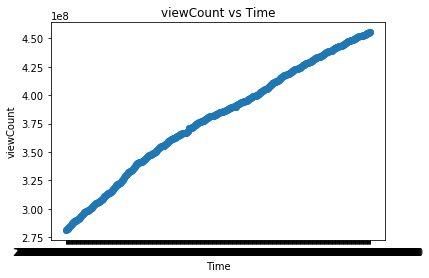

In [8]:
plt.scatter(df1['Time'],df1['viewCount'])
plt.title('viewCount vs Time')
plt.xlabel('Time')
plt.ylabel('viewCount')
plt.show()#we can see the viewcount and time forms a linear relationship.

### LinearRegression model: viewCount and Time
We train a linearRegression model to model the linear relation between viewCount and Time. Also, since the time in the dataset are strings and cannot be used to train our model, we could let the initial record time be 0, and since we have data recorded every hour, data of teh index column corresponding to each row could represent the time elapsed since the start of record.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df1[['viewCount']], df1[['index']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9879031316328957

we get a pretty high score, which indecates our linear model of viewcount and time is pretty accurate. Thus, we could have the conclusion that if the initial viewcount is high, the final viewcount will also be high. We do the similar process for the rest counts and try to find teh relation between these counts and time.

### Data Visualization: commentCount and Time
We use scatter plot here to find the relation between commentCount and Time.

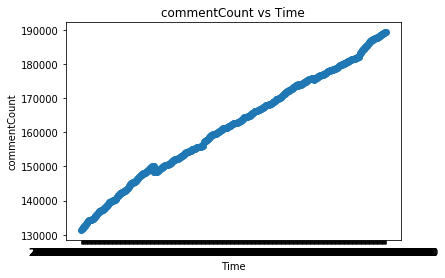

In [20]:
plt.scatter(df1['Time'],df1['commentCount'])
plt.title('commentCount vs Time')
plt.xlabel('Time')
plt.ylabel('commentCount')
plt.show()

We see that the relation between commentCount and Time is also mostly linear. Therefore we could choose LinearRegression model.

### LinearRegression model: commentCount and Time

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df1[['commentCount']], df1[['index']],
                                                    test_size=0.2, random_state=42)
#we could let the first record time be 0, and since we have data recorded every hr, 
#the index of the rows could represent teh time elapsed since the start of record.
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9957487072681469

### Data Visualization: likeCount and Time
We use scatter plot here to find the relation between likeCount and Time.

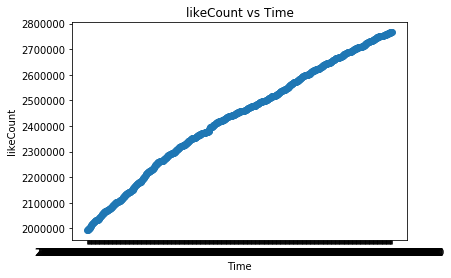

In [22]:
plt.scatter(df1['Time'],df1['likeCount'])
plt.title('likeCount vs Time')
plt.xlabel('Time')
plt.ylabel('likeCount')
plt.show()

### LinearRegression model: likeCount and Time

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df1[['likeCount']], df1[['index']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9870919411503317

### Data Visualization: dislikeCount and Time

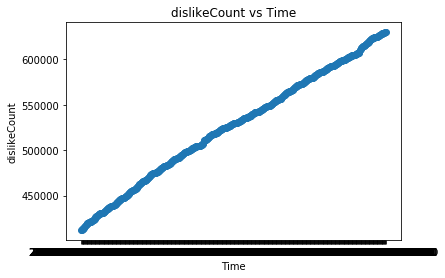

In [24]:
plt.scatter(df1['Time'],df1['dislikeCount'])
plt.title('dislikeCount vs Time')
plt.xlabel('Time')
plt.ylabel('dislikeCount')
plt.show()

### LinearRegression model: dislikeCount and Time

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df1[['dislikeCount']], df1[['index']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9971574888627115

These count and time all have linear relation, and these linear relations indicate that the initial commentcount, viewcount, likecount, dislikecount, and their corresponding final values also have linear relations. Therefore we could make the prediction that we could build linear models to use the initial data to predict the possible final data, and tehrefore predict teh final performance of videos by looking at their initial performance.

## Data Cleaning and Preparation

We can see that we do have some null values in df3 and we need to fill them with mean value.
We could choose mean because the dataset is relatively big, thus teh mean value could be a good representation of the possible NaN values.

In [14]:
df2=df.loc[df['Time']=='2018-05-07 18:00:00']  #Initial Performance
df3=df.loc[df['Time']=='2018-06-05 16:00:00']  #Final Performance
print(pd.isnull(df2).sum() > 0)
print(pd.isnull(df3).sum() > 0)

df3['commentCount']=df3['commentCount'].fillna(df3['commentCount'].mean())
df3['dislikeCount']=df3['dislikeCount'].fillna(df3['dislikeCount'].mean())
df3['likeCount']=df3['likeCount'].fillna(df3['likeCount'].mean())
df3['viewCount']=df3['viewCount'].fillna(df3['viewCount'].mean())
print(pd.isnull(df3).sum() > 0) #filled all teh NaN values successfully.

Unnamed: 0      False
index           False
videoId         False
commentCount    False
dislikeCount    False
likeCount       False
viewCount       False
Time            False
dtype: bool
Unnamed: 0      False
index           False
videoId         False
commentCount     True
dislikeCount     True
likeCount        True
viewCount        True
Time            False
dtype: bool
Unnamed: 0      False
index           False
videoId         False
commentCount    False
dislikeCount    False
likeCount       False
viewCount       False
Time            False
dtype: bool


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [15]:
df2.head()

,Unnamed: 0,index,videoId,commentCount,dislikeCount,likeCount,viewCount,Time
0,0,0,FzG4uDgje3M,131330.0,411967.0,1993172.0,281321552.0,2018-05-07 18:00:00
695,695,0,LOYAomlRbxI,13009.0,33188.0,706006.0,80762575.0,2018-05-07 18:00:00
1390,1390,0,Bm8rz-llMhE,14108.0,22212.0,647831.0,56259050.0,2018-05-07 18:00:00
2085,2085,0,pd7AMDMotyM,31895.0,41267.0,688754.0,53295716.0,2018-05-07 18:00:00
2780,2780,0,4kDklB6-69Q,69616.0,20403.0,1048729.0,46531812.0,2018-05-07 18:00:00


In [16]:
df3.head()

,Unnamed: 0,index,videoId,commentCount,dislikeCount,likeCount,viewCount,Time
694,694,694,FzG4uDgje3M,189275.0,629812.0,2766240.0,455484023.0,2018-06-05 16:00:00
1389,1389,694,LOYAomlRbxI,18356.0,45104.0,871510.0,127695401.0,2018-06-05 16:00:00
2084,2084,694,Bm8rz-llMhE,15292.0,27104.0,749639.0,73132418.0,2018-06-05 16:00:00
2779,2779,694,pd7AMDMotyM,33809.0,45976.0,759788.0,69713153.0,2018-06-05 16:00:00
3474,3474,694,4kDklB6-69Q,80483.0,27939.0,1300899.0,74497727.0,2018-06-05 16:00:00


Then we try to find teh relationship between their initial performance and final performance.
We expect this to be a linear relationship according to our pervious analysis, but we first need to 
visualize their relationship to confirm our prediction.
Since these data for the ith entries in df2 and df3 are of the same video, we do not need to alter teh 
position of rows of df2 and df3 since they are alerady matched.

### Data Visualization: initial commentCount and final commentCount¶

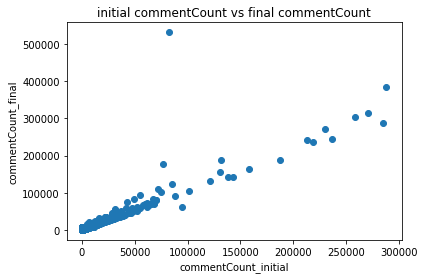

In [17]:
plt.scatter(df2['commentCount'],df3['commentCount'])
plt.title('initial commentCount vs final commentCount')
plt.xlabel('commentCount_initial')
plt.ylabel('commentCount_final')
plt.show()

Our prediction about commentCount is confirmed and therefore we could use linearRegression model to predict their relationship.

### LinearRegression model: initial commentCount and final commentCount

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df2[['commentCount']], df3[['commentCount']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9413618049461213

Our model is actually very accurate. Then we could repeat the same process for the other initial counts and their corresponding final counts.

### Data Visualization: initial dislikeCount and final dislikeCount

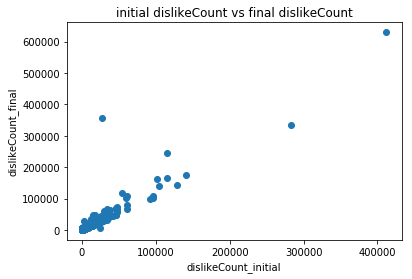

In [140]:
plt.scatter(df2['dislikeCount'],df3['dislikeCount'])
plt.title('initial dislikeCount vs final dislikeCount')
plt.xlabel('dislikeCount_initial')
plt.ylabel('dislikeCount_final')
plt.show()

### LinearRegression model: initial dislikeCount and final dislikeCount

In [141]:
x_train, x_test, y_train, y_test = train_test_split(df2[['dislikeCount']], df3[['dislikeCount']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9148001792486558

### Data Visualization: initial likeCount and final likeCount

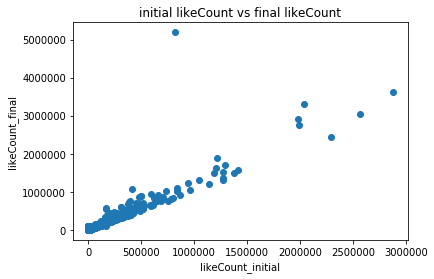

In [143]:
plt.scatter(df2['likeCount'],df3['likeCount'])
plt.title('initial likeCount vs final likeCount')
plt.xlabel('likeCount_initial')
plt.ylabel('likeCount_final')
plt.show()

### LinearRegression model: initial likeCount and final likeCount

In [144]:
x_train, x_test, y_train, y_test = train_test_split(df2[['likeCount']], df3[['likeCount']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9525271639824997

### Data Visualization: initial viewCount and final viewCount

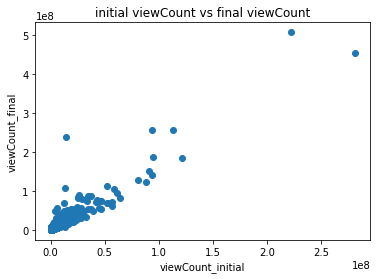

In [145]:
plt.scatter(df2['viewCount'],df3['viewCount'])
plt.title('initial viewCount vs final viewCount')
plt.xlabel('viewCount_initial')
plt.ylabel('viewCount_final')
plt.show()

### LinearRegression model: initial viewCount and final viewCount

In [146]:
x_train, x_test, y_train, y_test = train_test_split(df2[['viewCount']], df3[['viewCount']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9290609451362057

## Interpretation of the result

Our result shows that the initial performance of a video is linearly correlated to its final performance. Therefore, we could predict the final performance of YouTube videos by looking at their initial performance; this is veru useful for the YouTubers since they could know whether or not their video will be very popular after some time and therefore make predictions about their possible incomes. We could also see that if you want to make your video a popular one, you need to make it as popular as possible at the beginning.